In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import unyt
import swiftsimio as sw
import h5py
import collections

In [12]:
target_file = np.load('tables/targets_L025_m5_z0.0.npy')
SOAP_IDs = target_file[:,0]
HBT_IDs = target_file[:,1]

HBT_ID = HBT_IDs[0]

In [59]:
fields = {'Subhalos': ("TrackId", "SinkTrackId", "DescendantTrackId", "SnapshotIndexOfDeath", "Mbound", "LastMaxMass", "SnapshotIndexOfLastMaxMass")}

In [60]:
def read(model_dir, snapshot, fields, subvolumes):
    """Read the galaxies.hdf5 file for the given model/snapshot/subvolume"""

    data = collections.OrderedDict()
    for idx, subv in enumerate(subvolumes):
        fname = model_dir + snapshot + '/SubSnap_' + snapshot + '.' + str(subv) + ".hdf5"
        print(fname)
        #fname = os.path.join(model_dir, str(snapshot), str(subv), 'extinction.hdf5')
        with h5py.File(fname, 'r') as f:
            for gname, dsnames in fields.items():
                group = f[gname]
                for dsname in dsnames:
                    full_name = '%s/%s' % (gname, dsname)
                    l = data.get(full_name, None)
                    if l is None:
                        l = group[dsname][()]
                    else:
                        l = np.concatenate([l, group[dsname][()]])
                    data[full_name] = l

    return list(data.values())

In [61]:
model_dir = "/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/"
file = read(model_dir,'127',fields,range(16))

/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.0.hdf5


/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.1.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.2.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.3.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.4.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.5.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.6.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.7.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.8.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.9.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.10.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_m5/HBTplus/127/SubSnap_127.11.hdf5
/cosma8/data/dp004/colibre/Runs/L025_m5/THERMAL_AGN_

In [62]:
TrackIDs = file[0]
SinkIDs = file[1]
DescIDs = file[2]
DeathSnap = file[3]
MassNow = file[4]
MassMax = file[5]
MaxSnap = file[6]

In [63]:
for i in range(-1,128):
    print(i,np.sum(DeathSnap==i))

-1 1219867
0 0
1 0
2 1
3 11
4 55
5 128
6 293
7 804
8 1795
9 2039
10 2792
11 3909
12 5336
13 7447
14 10100
15 13339
16 17580
17 22158
18 27455
19 18056
20 20114
21 22618
22 24450
23 26860
24 29677
25 32413
26 35653
27 39359
28 41431
29 24754
30 25143
31 25844
32 29941
33 25087
34 28554
35 29450
36 30649
37 31101
38 32417
39 33701
40 35200
41 35523
42 36885
43 38261
44 39236
45 40531
46 41151
47 42532
48 44177
49 44964
50 46638
51 47118
52 47815
53 48869
54 49212
55 49889
56 50329
57 51298
58 51444
59 52111
60 52101
61 52649
62 53205
63 52574
64 52872
65 53274
66 52732
67 53592
68 53010
69 29307
70 28449
71 28062
72 27664
73 30459
74 26280
75 27787
76 27935


77 28300
78 28707
79 28986
80 29189
81 29497
82 29649
83 29563
84 29863
85 29808
86 30216
87 30332
88 30570
89 33031
90 28880
91 32292
92 28172
93 23665
94 25345
95 21960
96 22774
97 22844
98 22993
99 23084
100 22339
101 22308
102 22519
103 12137
104 11356
105 11148
106 11169
107 10910
108 11057
109 10830
110 10886
111 10879
112 10695
113 10752
114 12259
115 7826
116 8360
117 9778
118 8028
119 9863
120 8678
121 7818
122 4522
123 4561
124 4477
125 4555
126 4707
127 4762


In [ ]:
print(len(TrackIDs))
print(np.max(TrackIDs)) # TrackIDs go from 0 to max
print(np.sum(TrackIDs==HBT_ID)) # there's only one of my galaxy :)

mygal = np.where(TrackIDs==HBT_ID)
#

4466414
4466415
1


In [ ]:
print(len(SinkIDs)) 
print(np.sum(SinkIDs==-1)) # subhalos which have not sunk - maybe they are still alive, or maybe they've been very disrupted and no longer exist
print(np.sum(SinkIDs==TrackIDs)) # subhalos which sink into themselves (not a thing)
print(np.sum(SinkIDs==HBT_ID)) # subhalos which sunk into my galaxy
print(SinkIDs[mygal]) # my galaxy still exists, so this is -1

mergers = (SinkIDs==HBT_ID)
print(TrackIDs[mergers]) # good - the merging subhalos are 3 completely different galaxies

4466415
3897687
0
3
[-1]
[ 35210  59856 200593]


In [ ]:
print(len(DescIDs))
print(np.sum(DescIDs==-1)) # subhalos which have no descendant - maybe they didn't previously exist, or maybe they have disrupted and no longer form part of a subhalo
print(np.sum(DescIDs==TrackIDs)) # well resolved in this snapshot and the previous, still subhalo-ing
print(np.sum(DescIDs==HBT_ID)) # subhalos which now exist within my galaxy (they got accumulated)
print(DescIDs[mygal]) # My galaxy is well-resolved in the sim
print(DescIDs[mergers]) # More confusing - [in the host, still exists?, in the first merged subhalo?]

mergers_more = (DescIDs==HBT_ID) # keep in mind that the host is one of these galaxies
print(TrackIDs[mergers_more][:14]) # another bunch of randos (35141 is the host)


4466415
743102
1217582
617
[35141]
[35141    -1 35210]
[    5   258   308  1821  2035  2069 10066 10087 10154 19466 34179 34301
 34742 35141]


In [ ]:
print(len(DeathSnap))
print(np.sum(DeathSnap==-1)) # these are the subhalos that are still alive - very similar to the well-resolved halos?! (so surviving halos are either nicely resolved, or brand new)
print(DeathSnap[mygal]) # my galaxy isn't dead yet
print(DeathSnap[mergers]) # they all merged quite a while ago - did merger #3 first merge with #1, then the host?
print(DeathSnap[mergers_more][:14]) # all dead, except for the host

4466415
1219867
[-1]
[29 57 15]
[ 70  63  94  79  83 100 110  57 110 102  96 106  95  -1]


In [ ]:
print(MassNow[mygal]) # my galaxy has a mass. not entirely sure on the units
print(MassNow[mergers]) # the merged galaxies don't have any mass
print(MassNow[mergers_more][:14]) # all have no mass, except for the host


[54.85921]
[0. 0. 0.]
[ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.      54.85921]


In [ ]:
print(MassMax[mygal]) # my galaxy is at its max mass (spoiler)
print(MassMax[mergers]) # these galaxies weren't ever very big
print(MassMax[mergers_more][:14]) # these galaxies were, in general, a bit bigger? Some might meet the threshold for a minor merger

[54.85921]
[0.01532037 0.29940382 0.00167146]
[1.3887619e+00 5.0000221e-01 1.8589092e+00 1.0485445e-02 3.4609041e+00
 6.2176509e+00 7.5255451e+00 2.8241087e-02 9.2461699e-01 3.3025134e-02
 9.3984914e-01 8.3577968e-03 5.8304805e-01 5.4859211e+01]


In [ ]:
print(MaxSnap[mygal]) # my galaxy is at its max mass (duh)
print(MaxSnap[mergers]) # all reached max mass shortly before merging
print(MaxSnap[mergers_more][:14]) # look, regardless of what I work out they all merged some time ago

[127]
[23 46 10]
[ 59  54  81  61  71  86  98  37  94  42  81  54  67 127]


For my example galaxy, 3 subhalos are recorded as "sinking" into it, and 617 are have it as their recorded "descendant"

The 3 sinks are the most likely to be major mergers (see Slack)

In [5]:
colibre_base_path = "/mnt/su3-pro/colibre/"
simulation_dir = "L0025N0752/THERMAL_AGN"

soap_path = "SOAP/halo_properties_0123.hdf5"
soap_catalogue_file = os.path.join(colibre_base_path, simulation_dir, soap_path)
catalogue_z0 = sw.load(soap_catalogue_file)

soap_path = "SOAP/halo_properties_0115.hdf5"
soap_catalogue_file = os.path.join(colibre_base_path, simulation_dir, soap_path)
catalogue_z01 = sw.load(soap_catalogue_file)

soap_path = "SOAP/halo_properties_0106.hdf5"
soap_catalogue_file = os.path.join(colibre_base_path, simulation_dir, soap_path)
catalogue_z03 = sw.load(soap_catalogue_file)

soap_path = "SOAP/halo_properties_0098.hdf5"
soap_catalogue_file = os.path.join(colibre_base_path, simulation_dir, soap_path)
catalogue_z05 = sw.load(soap_catalogue_file)

soap_path = "SOAP/halo_properties_0088.hdf5"
soap_catalogue_file = os.path.join(colibre_base_path, simulation_dir, soap_path)
catalogue_z1 = sw.load(soap_catalogue_file)

soap_path = "SOAP/halo_properties_0072.hdf5"
soap_catalogue_file = os.path.join(colibre_base_path, simulation_dir, soap_path)
catalogue_z2 = sw.load(soap_catalogue_file)

In [4]:
dir(catalogue_z0.input_halos_hbtplus)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_depth',
 '_descendant_track_id',
 '_host_fofid',
 '_last_max_mass',
 '_last_max_vmax_physical',
 '_nested_parent_track_id',
 '_snapshot_index_of_birth',
 '_snapshot_index_of_last_max_mass',
 '_snapshot_index_of_last_max_vmax',
 '_track_id',
 'depth',
 'descendant_track_id',
 'filename',
 'generate_empty_properties',
 'group',
 'group_metadata',
 'group_name',
 'host_fofid',
 'last_max_mass',
 'last_max_vmax_physical',
 'metadata',
 'nested_parent_track_id',
 'snapshot_index_of_birth',
 'snapshot_index_of_last_max_mass',
 'snapshot_index_of_last_max_vmax',
 'track_id',
 'units']

In [11]:
z0targets = np.load("tables/targets_L0025_N0752_z0.0.npy")
print(z0targets)

[[    479]
 [  12834]
 [  21662]
 [  63640]
 [  72921]
 [  95758]
 [ 117225]
 [ 123105]
 [ 126101]
 [ 138682]
 [ 139503]
 [ 168669]
 [ 169324]
 [ 171447]
 [ 185981]
 [ 196915]
 [ 199853]
 [ 202239]
 [ 202278]
 [ 207333]
 [ 210491]
 [ 230185]
 [ 234497]
 [ 247235]
 [ 279746]
 [ 311056]
 [ 314117]
 [ 325527]
 [ 337295]
 [ 341961]
 [ 344983]
 [ 350948]
 [ 369465]
 [ 375108]
 [ 389320]
 [ 395325]
 [ 400067]
 [ 411472]
 [ 449105]
 [ 488624]
 [ 502496]
 [ 515676]
 [ 566723]
 [ 569079]
 [ 584263]
 [ 704069]
 [ 732277]
 [ 748771]
 [ 772669]
 [ 803198]
 [ 839320]
 [ 870783]
 [ 871854]
 [ 886409]
 [ 938624]
 [ 939807]
 [ 941998]
 [ 946322]
 [ 958476]
 [ 959270]
 [ 970084]
 [1015322]
 [1025801]
 [1028096]
 [1041630]
 [1064168]
 [1075667]
 [1092917]
 [1096215]
 [1099354]
 [1099962]
 [1118204]
 [1126633]
 [1150500]
 [1167626]
 [1174529]
 [1176585]
 [1179468]
 [1199099]]


In [ ]:
print(len(catalogue_z2.input_halos_hbtplus.track_id))
print(len(catalogue_z1.input_halos_hbtplus.track_id))
print(len(catalogue_z05.input_halos_hbtplus.track_id))
print(len(catalogue_z03.input_halos_hbtplus.track_id))
print(len(catalogue_z01.input_halos_hbtplus.track_id))
print(len(catalogue_z0.input_halos_hbtplus.track_id))
# so number of SOAP halos is going down with time -> merged subhalos are not included



1641245
1445135
1332391
1288250
1239642
1216683


In [ ]:
ID = z0targets[0,0]

print(ID)
print('halocatindex',catalogue_z0.input_halos.halo_catalogue_index[ID])
print('iscentral',catalogue_z0.input_halos.is_central[ID])
print('numbound',catalogue_z0.input_halos.number_of_bound_particles[ID])
print()

print('trackID',catalogue_z0.input_halos_hbtplus.track_id[ID])
print('depth',catalogue_z0.input_halos_hbtplus.depth[ID])
print('descendant_trackID',catalogue_z0.input_halos_hbtplus.descendant_track_id[ID])
print('hostFOFID',catalogue_z0.input_halos_hbtplus.host_fofid[ID])
print('parent_trackID',catalogue_z0.input_halos_hbtplus.nested_parent_track_id[ID])
print('birthsnapshot',catalogue_z0.input_halos_hbtplus.snapshot_index_of_birth[ID])
print('maxmasssnapshot',catalogue_z0.input_halos_hbtplus.snapshot_index_of_last_max_mass[ID])

# what I can say about this subhalo:
# it is the central subhalo, its own descendant, etc. etc.
# formed at z=14, reached peak mass at z=0 (now)


479
halocatindex 22563 dimensionless (Physical)
iscentral 1 dimensionless (Physical)
numbound 1848913 dimensionless (Physical)

trackID 199742 dimensionless (Physical)
depth 0 dimensionless (Physical)
descendant_trackID 199742 dimensionless (Physical)
hostFOFID 130411 dimensionless (Physical)
parent_trackID -1 dimensionless (Physical)
birthsnapshot 10 dimensionless (Physical)
maxmasssnapshot 123 dimensionless (Physical)


In [50]:
trackIDs = catalogue_z0.input_halos_hbtplus.track_id
descendantIDs = catalogue_z0.input_halos_hbtplus.descendant_track_id
parentIDs = catalogue_z0.input_halos_hbtplus.nested_parent_track_id

halocens = catalogue_z0.input_halos.halo_centre

target_trackID = trackIDs[ID]
print(target_trackID)

199742 dimensionless (Physical)


In [65]:
halocens.shape

(1216683, 3)

In [48]:
print(target_trackID)
print(np.sum(trackIDs == target_trackID))
print(np.sum(descendantIDs == target_trackID))
print(np.sum(parentIDs == target_trackID))

satellites = np.argwhere(parentIDs == target_trackID)

199742 dimensionless (Physical)
1
1
271


In [62]:
halocens[satellites][:,:,0]

cosmo_array([[2.07330927e-01],
       [1.05661929e-01],
       [1.24463923e-01],
       [1.40086919e-01],
       [1.18377924e-01],
       [1.47926927e-01],
       [2.12468922e-01],
       [1.80136919e-01],
       [1.98327929e-01],
       [1.29251927e-01],
       [1.01386927e-01],
       [1.20524928e-01],
       [2.96263933e-01],
       [3.61489281e-02],
       [1.86264932e-01],
       [1.63842931e-01],
       [3.01760912e-01],
       [1.20709926e-01],
       [4.61589247e-02],
       [2.38436922e-01],
       [1.74692929e-01],
       [9.14809257e-02],
       [1.44545928e-01],
       [2.52009239e-02],
       [1.51978925e-01],
       [2.00806931e-01],
       [2.18782932e-01],
       [1.66025922e-01],
       [1.47884920e-01],
       [1.24778926e-01],
       [1.03552930e-01],
       [1.47191927e-01],
       [7.64809251e-02],
       [1.64005920e-01],
       [1.06896929e-01],
       [2.14077920e-01],
       [1.75860927e-01],
       [1.73848927e-01],
       [1.76909249e-02],
       [8.63539279e

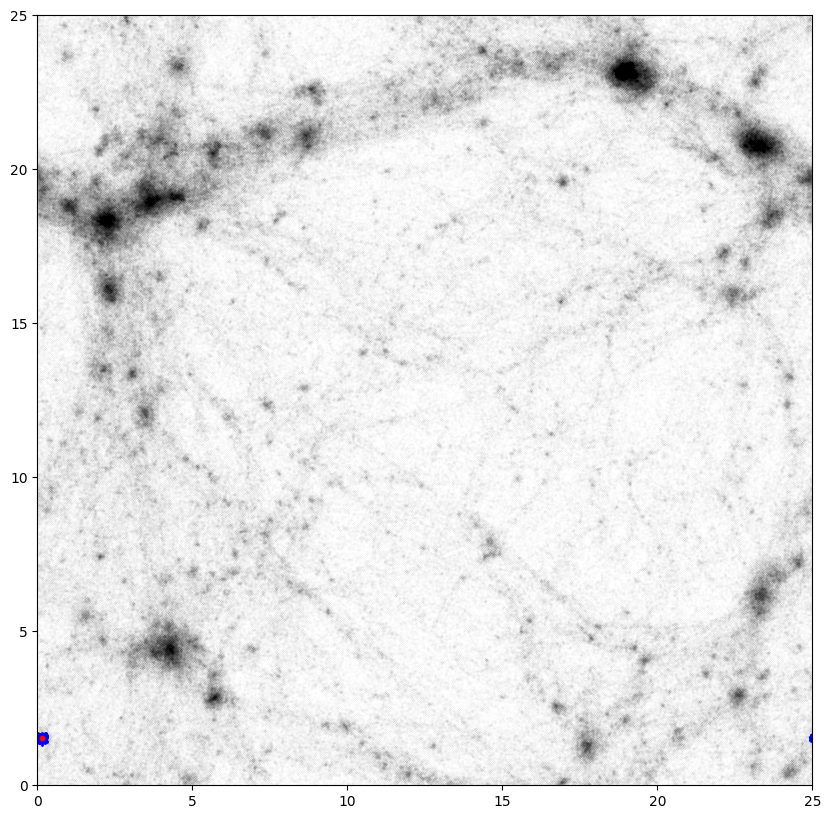

In [75]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(halocens[:,0],halocens[:,1],s=0.0001,c='k') # all subhalos
ax.scatter(halocens[satellites,0],halocens[satellites,1],s=1,c='b') # target galaxy
ax.scatter(halocens[ID,0],halocens[ID,1],s=10,c='r') # target galaxy
ax.set_xlim((0,boxsize[0]))
ax.set_ylim((0,boxsize[1]))

plt.show()

In [78]:
trackIDs_z1 = catalogue_z1.input_halos_hbtplus.track_id
descendantIDs_z1 = catalogue_z1.input_halos_hbtplus.descendant_track_id
parentIDs_z1 = catalogue_z1.input_halos_hbtplus.nested_parent_track_id

halocens_z1 = catalogue_z1.input_halos.halo_centre

boxsize_z1 = catalogue_z1.metadata.boxsize

In [ ]:
trackIDs_z1.cosmo_factor = 1
target_trackID.cosmo_factor = 1
descendantIDs_z1.cosmo_factor
trackIDs_z1

cosmo_array([1033527,  765330, 1583343, ..., 4118066, 3252984, 1951512],
      shape=(1445135,), dtype=uint64, units='(dimensionless)', comoving='False', cosmo_factor='1', valid_transform='False')

In [86]:
target = np.argwhere(trackIDs_z1==target_trackID)

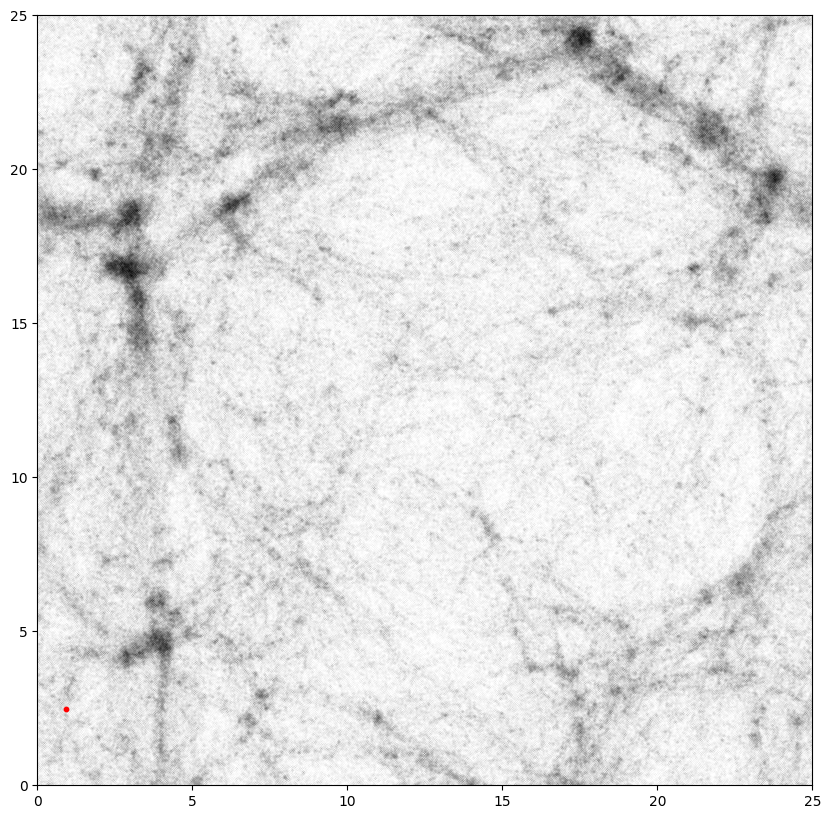

In [88]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(halocens_z1[:,0],halocens_z1[:,1],s=0.0001,c='k') # all subhalos
#ax.scatter(halocens[satellites,0],halocens[satellites,1],s=1,c='b') # target galaxy
ax.scatter(halocens[target,0],halocens[target,1],s=10,c='r') # target galaxy
ax.set_xlim((0,boxsize_z1[0]))
ax.set_ylim((0,boxsize_z1[1]))

plt.show()